In [ ]:
# Load pretrained model and look at the spectrogram cnn's weights
import torch
import torchaudio
import os
from diffwave.params import AttrDict, params as base_params
from diffwave.model import DiffWave

device = torch.device('cpu')

model_dir = 'diffwave-ljspeech-22kHz-1000578.pt'

checkpoint = torch.load(model_dir, map_location=device)
model = DiffWave(AttrDict(base_params)).to(device)


In [ ]:
from diffwave.preprocess import transform
data_dir = '/Users/lukgar/Desktop/exjobb/datasets/LJSpeech-1.1/wavs'
filename = data_dir + '/LJ001-0001.wav'

spec = transform(filename, save=False)
spectrogram = spec.view(1, *spec.shape)

audio, sr = torchaudio.load(filename)
spec_shape = tuple(spectrogram.shape)
audio_shape = (1, base_params.hop_samples * spec_shape[-1]) # Should be 113408? Padding?
step_shape = (1,)

from torchinfo import summary
summary(model, [audio_shape, step_shape, spec_shape], depth=2)

In [ ]:
model.load_state_dict(checkpoint['model'])
model.eval()

In [ ]:
# print name of each layer
for name, param in model.named_parameters():
    print(name) if 'spectrogram_upsampler' in name else None

In [ ]:
# Print all layers
for name, layer in model.named_modules():
    print(name, type(name))
    print(layer, type(layer))

In [ ]:
summary(model.spectrogram_upsampler, spec_shape, depth=2)

In [21]:
spec_out = model.spectrogram_upsampler(spectrogram)

print(spectrogram.shape)
print(spec_out.shape)

torch.Size([1, 80, 832])
torch.Size([1, 80, 212992])


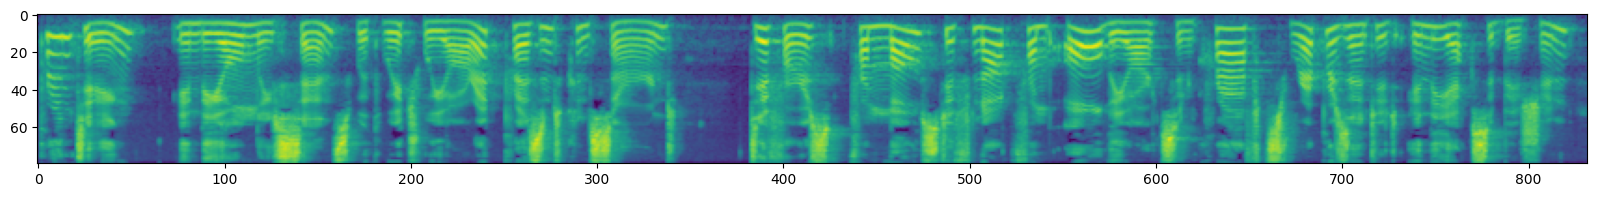

In [26]:
# plot spectrogram and spec_out
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 8]

plt.imshow(spectrogram[0, :, :].detach().numpy());




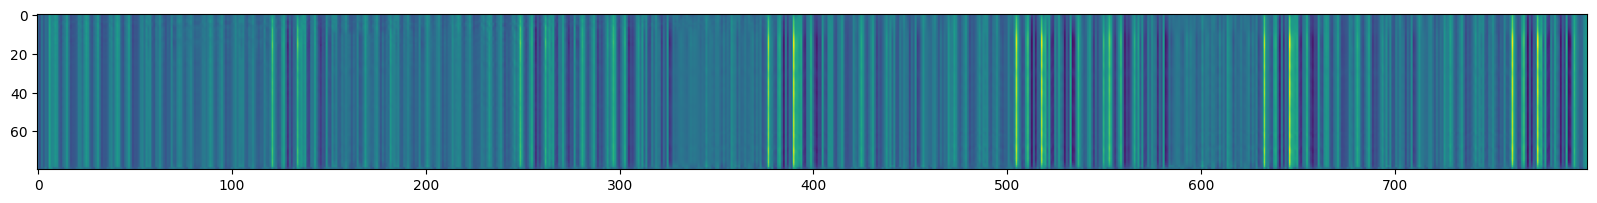

In [35]:
# plot spec out
fig, ax = plt.subplots()
ax.set_aspect(0.1)
im = ax.imshow(spec_out[0, :, :800].detach().numpy())



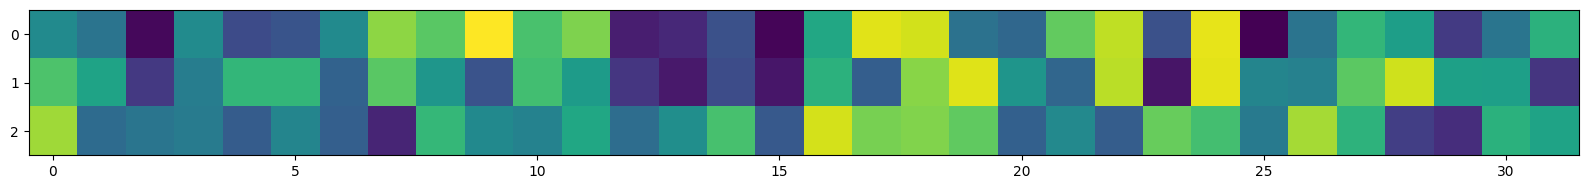

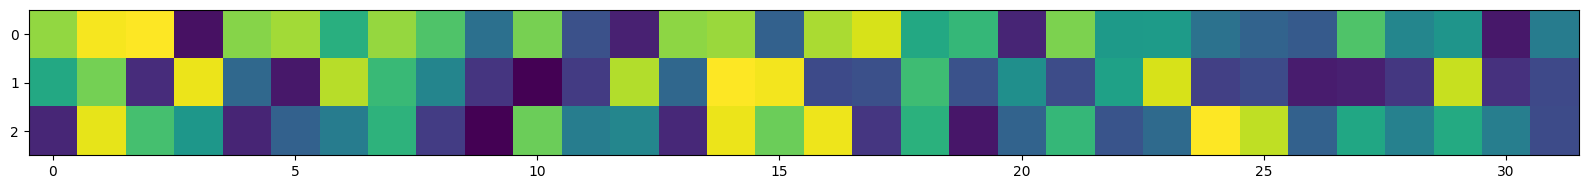

In [46]:
# plot the weights of the spectrogram_upsampler
weights = []
for name, param in model.spectrogram_upsampler.named_parameters():
    if 'weight' in name:
        # plot image of weights
        fig, ax = plt.subplots()
        ax.imshow(param[0,0,:,:].detach().numpy())



torch.Size([128, 64, 3])


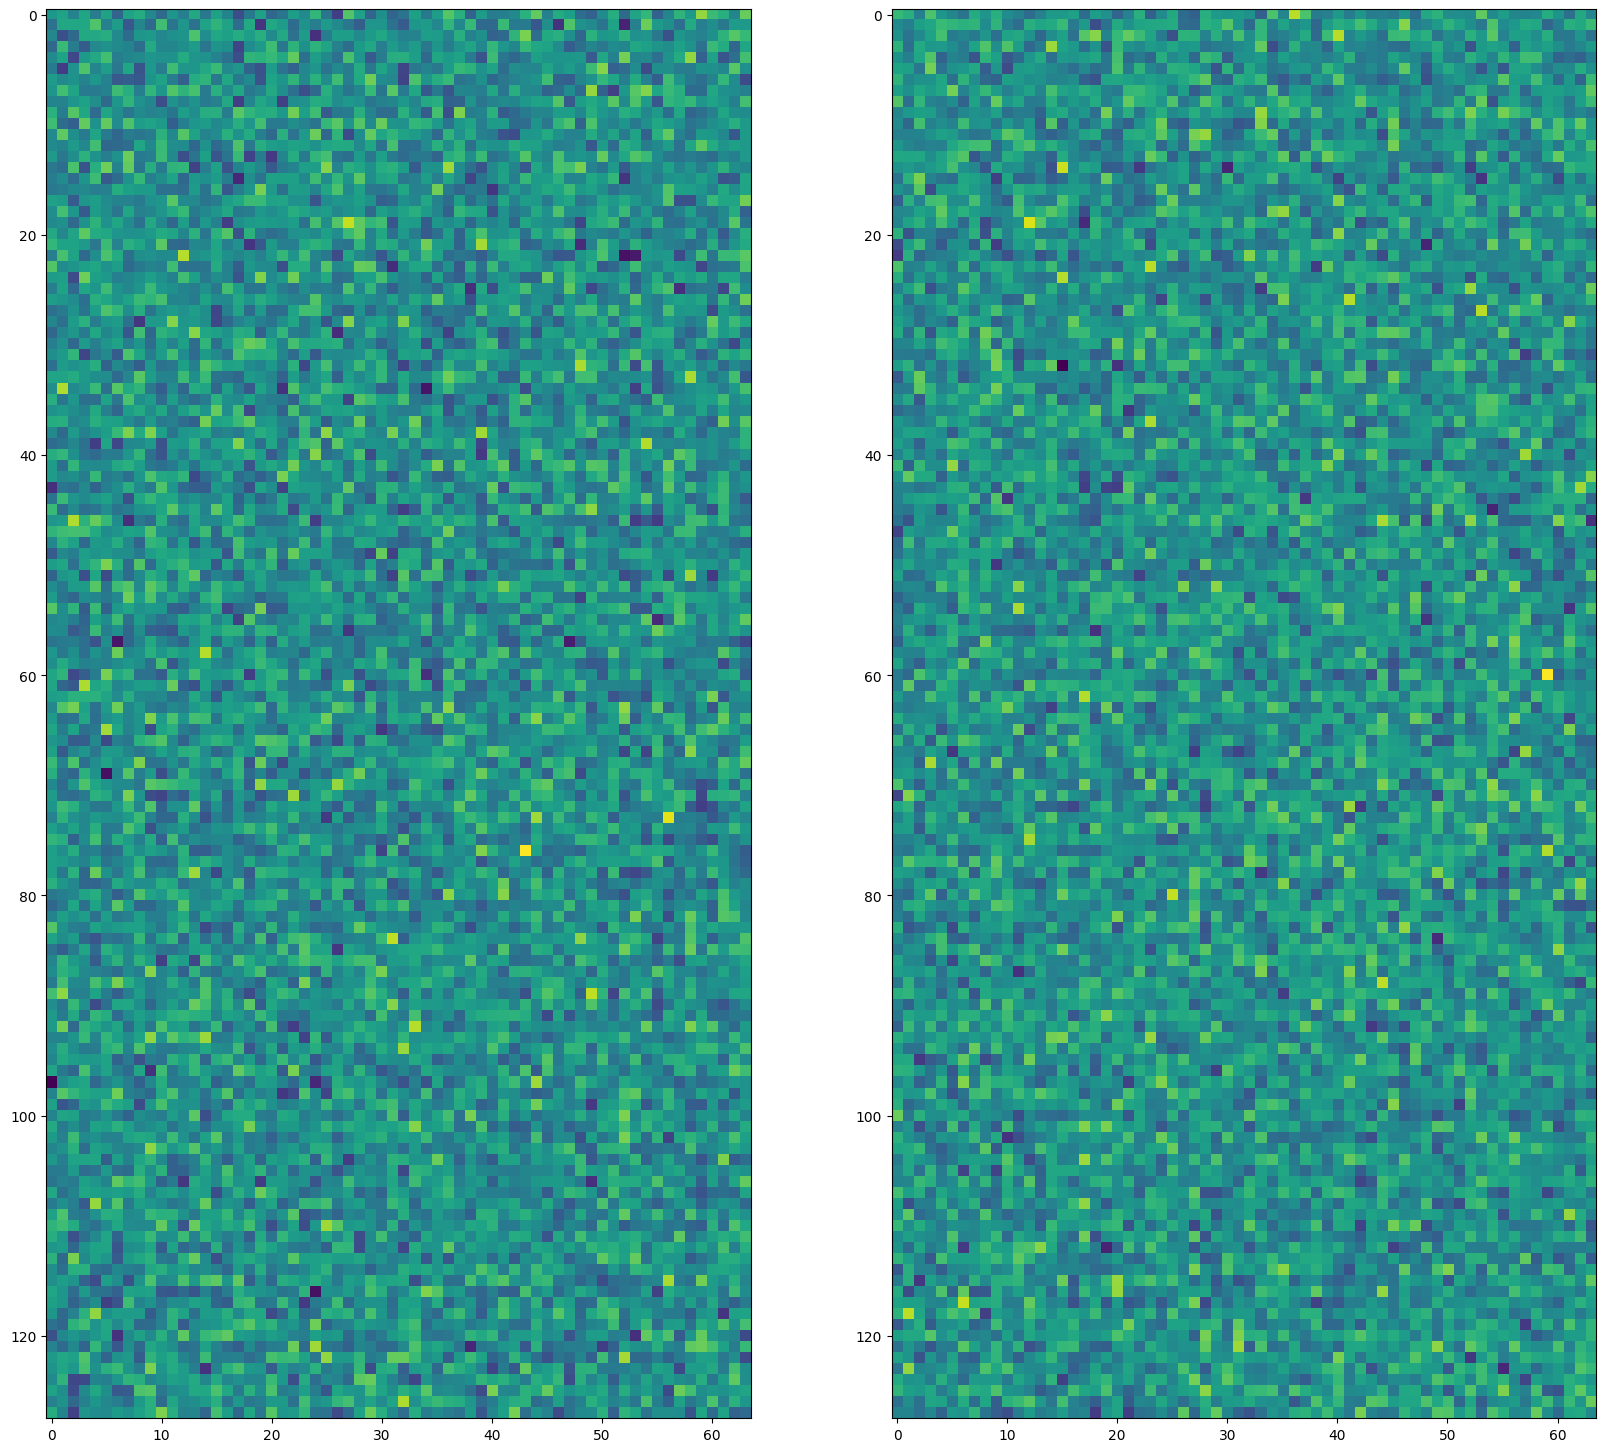

In [76]:
for module in model.residual_layers:
    for name, param in module.dilated_conv.named_parameters():
        print(param.shape)
        # imshow subplot of weights
        i = 2
        fig, ax = plt.subplots(1, i)
        for j in range(i):
            ax[j].imshow(param[:,:,j].detach().numpy())
        break
    break

In [ ]:
# Man kan typ inte se något eventuellt derivata-filter i viktera